# Pandas Tutorials

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Series

In [2]:
#Series

data = np.random.rand(5)
index = ["a", "b", "c", "d", "e"]

s = pd.Series(data, index=index)
s

a    0.070974
b    0.605428
c    0.905099
d    0.599244
e    0.002594
dtype: float64

In [3]:
s.array

<NumpyExtensionArray>
[  0.07097432554596261,    0.6054279713185199,     0.905098775674839,
    0.5992441692030294, 0.0025940637437164016]
Length: 5, dtype: float64

#### ndarray

In [4]:

s.to_numpy()

array([0.07097433, 0.60542797, 0.90509878, 0.59924417, 0.00259406])

In [5]:
# Name attribute

s = pd.Series(np.random.rand(5), name="something")
s

0    0.183904
1    0.525521
2    0.738206
3    0.610175
4    0.815040
Name: something, dtype: float64

In [6]:
s.name

'something'

## DataFrame

In [7]:
d = {
    "one" : pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two" : pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"])
}

In [8]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [9]:
# From dict or dict of array to dataframe

df = pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient = "index",
    columns =["one", "two", "three"],
)

df

,one,two,three
A,1,2,3
B,4,5,6


#### Assign

In [10]:
data = {"SepalWidth": [5.1, 4.9, 4.7, 4.6 , 5.0], "SepalLength": [3.5, 3.0, 3.2, 3.1, 3.6],
        "PetalWidth": np.multiply([5.1, 4.9, 4.7, 4.6 , 5.0],2), "PetalLength": np.multiply([3.5, 3.0, 3.2, 3.1, 3.6], 2)}
iris = pd.DataFrame(data)

iris

,SepalWidth,SepalLength,PetalWidth,PetalLength
0,5.1,3.5,10.2,7.0
1,4.9,3.0,9.8,6.0
2,4.7,3.2,9.4,6.4
3,4.6,3.1,9.2,6.2
4,5.0,3.6,10.0,7.2


In [11]:
iris.assign(Sepal_ration=iris["SepalWidth"] / iris["SepalLength"])

,SepalWidth,SepalLength,PetalWidth,PetalLength,Sepal_ration
0,5.1,3.5,10.2,7.0,1.457143
1,4.9,3.0,9.8,6.0,1.633333
2,4.7,3.2,9.4,6.4,1.468750
3,4.6,3.1,9.2,6.2,1.483871
4,5.0,3.6,10.0,7.2,1.388889


<Axes: xlabel='Sepal_ration', ylabel='Petal_ration'>

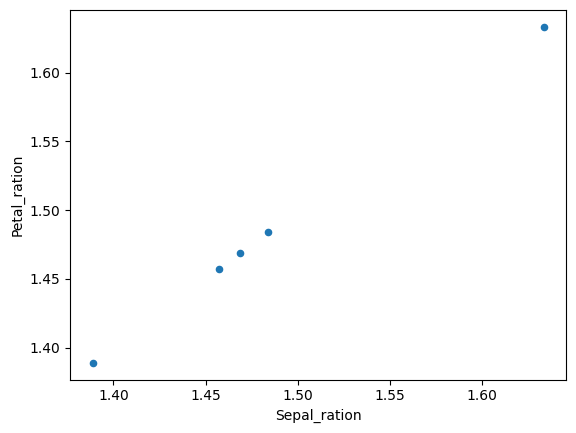

In [12]:
(
    iris.query("SepalLength > 2.5").assign(
        Sepal_ration=lambda x: x.SepalWidth / x.SepalLength,
        Petal_ration=lambda x: x.PetalWidth / x.PetalLength
        ).plot(kind="scatter", x="Sepal_ration", y="Petal_ration")
)

### Indexing / selection

| Operation                        | Syntax           | Result     |
|----------------------------------|------------------|------------|
| Select column                    | `df[col]`        | Series     |
| Select row by label             | `df.loc[label]`  | Series     |
| Select row by integer location | `df.iloc[loc]`   | Series     |
| Slice rows                       | `df[5:10]`       | DataFrame  |
| Select rows by boolean vector   | `df[bool_vec]`   | DataFrame  |


In [13]:
df_index = pd.DataFrame({
    "A" : np.random.random_sample(7),
    "B" : np.random.random_sample(7),
    "C" : np.random.random_sample(7),
    "D" : np.random.random_sample(7),
    "E" : np.random.random_sample(7),
    })

In [14]:
df_index

,A,B,C,D,E
0,0.242129,0.113043,0.979918,0.790938,0.688012
1,0.556731,0.839200,0.175453,0.721456,0.399310
2,0.718106,0.778520,0.399950,0.946933,0.094716
3,0.748718,0.829449,0.553974,0.858392,0.041396
4,0.551422,0.407298,0.149546,0.657179,0.737479
5,0.160713,0.002837,0.958795,0.830992,0.199806
6,0.776500,0.937386,0.164757,0.190230,0.172295


In [15]:
# Data alignment and arithmatic

df_alignment_1 = pd.DataFrame(np.random.rand(10, 4), columns=["A", "B", "C", "D"])
df_alignment_2 = pd.DataFrame(np.random.rand(7 ,3), columns=["A", "B", "C"])
df_alignment_1 + df_alignment_2

,A,B,C,D
0,1.307800,1.872255,0.411416,NaN
1,1.256849,1.158559,0.897929,NaN
2,0.902792,0.148547,1.721945,NaN
3,0.991624,1.838688,0.787523,NaN
4,0.501278,1.376753,1.285554,NaN
5,1.041071,1.195780,0.458879,NaN
6,0.785193,1.113516,0.851816,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


## Essential basic functionality

### Attributes and underlying data

In [16]:
df_attribute = pd.DataFrame(
    np.random.randint(10, size=(7,5)),
    index = ["a", "b", "c", "d", "e", "f", "g"],
    columns = ["a", "b", "c", "d", "e"],
)
df_attribute.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [17]:
df_attribute.columns = [x.upper() for x in df_attribute.columns]
df_attribute.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [18]:
# numpy array

np.asarray(df_attribute)

array([[2, 2, 2, 4, 2],
       [7, 9, 8, 4, 5],
       [9, 2, 7, 6, 4],
       [9, 7, 0, 1, 4],
       [4, 8, 7, 5, 0],
       [6, 5, 8, 1, 4],
       [1, 2, 6, 7, 5]])

### Matching / broadcasting behavior

In [19]:
df_matching = pd.DataFrame({"one": pd.Series(np.random.randint(2, 5, 3), index=["a", "b", "c"]),
                   "two": pd.Series(np.random.randint(2, 5, 4), index=["a", "b", "c", "d"]),
                   "three":pd.Series(np.random.randint(2, 5, 3), index=["b", "c", "d"]),})

In [20]:
df_matching

,one,two,three
a,3.0,3,NaN
b,4.0,4,3.0
c,2.0,2,4.0
d,NaN,2,4.0


In [21]:
row_matching = df_matching.iloc[1]
row_matching

one      4.0
two      4.0
three    3.0
Name: b, dtype: float64

In [22]:
column_matching = df_matching['two']
column_matching

a    3
b    4
c    2
d    2
Name: two, dtype: int64

In [23]:
df_sub = df_matching.sub(row_matching, axis=1)
df_sub

,one,two,three
a,-1.0,-1.0,NaN
b,0.0,0.0,0.0
c,-2.0,-2.0,1.0
d,NaN,-2.0,1.0


### Missing data / operations with fill values

In [24]:
df_sub_miss = df_matching.copy()
df_sub_miss

,one,two,three
a,3.0,3,NaN
b,4.0,4,3.0
c,2.0,2,4.0
d,NaN,2,4.0


In [25]:
df_sub_miss.loc["d", "one"] = 1.0
df_sub_miss

,one,two,three
a,3.0,3,NaN
b,4.0,4,3.0
c,2.0,2,4.0
d,1.0,2,4.0


### Flexible comparisons

In [26]:
df = pd.DataFrame({
    'A': [1, 4],
    'B': [3, 2]
})

df2 = pd.DataFrame({
    'A': [2, 3],
    'B': [1, 2]
})

In [27]:
# df is greater than df2

df.gt(df2)

,A,B
0,False,True
1,True,False


### Boolean reductions

In [28]:
df_boolean = pd.DataFrame({
    'A': [1, 4],
    'B': [3, np.nan],
    'C': [np.nan, np.nan]
})

In [29]:
df_boolean

,A,B,C
0,1,3.0,NaN
1,4,NaN,NaN


In [30]:
(df_boolean > 0).all()

A     True
B    False
C    False
dtype: bool

In [31]:
df_boolean.dropna().empty

True

### Comparing array-like objects

In [32]:
result = (pd.Series(["A", "B", "C"]) == "C").any()
print(result)

True


### Combining overlapping data sets

In [33]:
df_combine1 = pd.DataFrame({
    "A": [1, np.nan, 3, 4, np.nan, 5],
    "B": [np.nan, np.nan, 7, 9, 5, 2]
})

df_combine1

,A,B
0,1.0,NaN
1,NaN,NaN
2,3.0,7.0
3,4.0,9.0
4,NaN,5.0
5,5.0,2.0


In [34]:
df_combine2 = pd.DataFrame({
    "A": [10, 2, 3, 4, np.nan, 5],
    "B": [7, 5, 6, 9, np.nan, 2]
})
df_combine2

,A,B
0,10.0,7.0
1,2.0,5.0
2,3.0,6.0
3,4.0,9.0
4,NaN,NaN
5,5.0,2.0


In [35]:
df_combine2.combine_first(df_combine1)

,A,B
0,10.0,7.0
1,2.0,5.0
2,3.0,6.0
3,4.0,9.0
4,NaN,5.0
5,5.0,2.0


In [36]:
# Combine
# Applies a custom function element-wise to combine two DataFrames or Series.

df1 = pd.DataFrame({'A': [5, 0], 'B': [2, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})

In [37]:
df3 = df1.combine(df2, np.maximum)
df3

,A,B
0,5,3
1,1,4


In [38]:
# Cumulative sum

df_sum = [3, 5, 8, 10]
df_cumsum = np.cumsum(df_sum)
df_cumsum

array([ 3,  8, 16, 26])

### Descriptive statistics

#### cut
- It makes equally spaced ranges

In [39]:
data_cut = [1, 2, 2, 3, 10, 100]
print(pd.cut(data_cut, bins=3), "\n")
pd.cut(data_cut, bins=3, labels=["low", "mediumn", "high"])

[(0.901, 34.0], (0.901, 34.0], (0.901, 34.0], (0.901, 34.0], (0.901, 34.0], (67.0, 100.0]]
Categories (3, interval[float64, right]): [(0.901, 34.0] < (34.0, 67.0] < (67.0, 100.0]] 



['low', 'low', 'low', 'low', 'low', 'high']
Categories (3, object): ['low' < 'mediumn' < 'high']

#### qcut
- It makes quantiles: each bin has roughly the same number of data points.

In [40]:
data_qcut = [1, 2, 2, 3, 10, 100]
print(pd.qcut(data_cut, q=3), "\n")
pd.qcut(data_cut, q=3, labels=["low", "mediumn", "high"])

[(0.999, 2.0], (0.999, 2.0], (0.999, 2.0], (2.0, 5.333], (5.333, 100.0], (5.333, 100.0]]
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 5.333] < (5.333, 100.0]] 



['low', 'low', 'low', 'mediumn', 'high', 'high']
Categories (3, object): ['low' < 'mediumn' < 'high']

### Function application

#### Pipe

In [41]:
# Pipe

data = [[8000, 1000], [9500, np.nan], [5000, 2000]]
df_salary = pd.DataFrame(data, columns=['Salary', 'Others'])

In [42]:
df_salary

,Salary,Others
0,8000,1000.0
1,9500,NaN
2,5000,2000.0


In [43]:
def subtract_federal_tax(df):
  return df * 0.9

def subtract_state_tax(df, rate):
    return df * (1 - rate)

def subtract_national_insurance(df, rate, rate_increase):
    new_rate = rate + rate_increase
    return df * (1 - new_rate)

In [44]:
df_processed = df_salary.pipe(subtract_federal_tax).pipe(subtract_state_tax, rate=0.12)
df_processed

,Salary,Others
0,6336.0,792.0
1,7524.0,NaN
2,3960.0,1584.0


#### Apply

- applies a function to each element.

In [45]:
df_processed.apply(lambda x: np.mean(x))


Salary    5940.0
Others    1188.0
dtype: float64

#### Aggregate

In [46]:
# Aggregating with multiple functions
# apply one or more aggregation functions to a DataFrame

In [47]:
data_agg = {
    'Sales': [200, 300, 250, 400],
    'Profit': [20, 30, 25, 50]
}
df_agg = pd.DataFrame(data_agg)
df_agg

,Sales,Profit
0,200,20
1,300,30
2,250,25
3,400,50


In [48]:
result = df_agg.agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['min', 'max', 'mean']
})
result

,Sales,Profit
sum,1150.0,NaN
mean,287.5,31.25
min,NaN,20.00
max,NaN,50.00


#### Transform
- It provide multiple operations at the same time rather than one-by-one.

In [49]:
# Transform

df_agg

,Sales,Profit
0,200,20
1,300,30
2,250,25
3,400,50


In [50]:
df_agg.transform(lambda x: x + 1)

,Sales,Profit
0,201,21
1,301,31
2,251,26
3,401,51


#### Map
- It is used to transform each value in a single column.

In [51]:
# map

df

,A,B
0,1,3
1,4,2


In [52]:
df_map = df['A'].map(lambda x: x+2)
df_map

0    3
1    6
Name: A, dtype: int64

#### Index
- It change the row or column labels of a DataFrame to a new set, adding missing labels with NaN values.

In [53]:
# Index

df_index = pd.DataFrame({
    'A': [10, 20, 30],
    'B': [40, 50, 60]
}, index=['x', 'y', 'z'])

In [54]:
df_index

,A,B
x,10,40
y,20,50
z,30,60


In [55]:
new_index = ['x', 'y', 'a', 'b']
df_reindexed = df_index.reindex(new_index, axis=0)
df_reindexed

,A,B
x,10.0,40.0
y,20.0,50.0
a,NaN,NaN
b,NaN,NaN


### Filling while reindexing

In [56]:
rng = pd.date_range("1/3/2000", periods=8)
rng

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [57]:
ts = pd.Series(np.random.randn(8), index=rng)
ts

2000-01-03    1.539282
2000-01-04    0.660503
2000-01-05    2.193809
2000-01-06    0.413149
2000-01-07    0.496666
2000-01-08   -1.672036
2000-01-09   -1.075063
2000-01-10   -0.275022
Freq: D, dtype: float64

In [58]:
ts2 = ts.iloc[[0, 3, 6]]
ts2

2000-01-03    1.539282
2000-01-06    0.413149
2000-01-09   -1.075063
Freq: 3D, dtype: float64

In [59]:
ts2.reindex(ts.index)

2000-01-03    1.539282
2000-01-04         NaN
2000-01-05         NaN
2000-01-06    0.413149
2000-01-07         NaN
2000-01-08         NaN
2000-01-09   -1.075063
2000-01-10         NaN
Freq: D, dtype: float64

#### ffill
- Fill values forward

In [60]:
ts2.reindex(ts.index, method='ffill')

2000-01-03    1.539282
2000-01-04    1.539282
2000-01-05    1.539282
2000-01-06    0.413149
2000-01-07    0.413149
2000-01-08    0.413149
2000-01-09   -1.075063
2000-01-10   -1.075063
Freq: D, dtype: float64

#### bfill
- Fill values backward

In [61]:
ts2.reindex(ts.index, method='bfill')

2000-01-03    1.539282
2000-01-04    0.413149
2000-01-05    0.413149
2000-01-06    0.413149
2000-01-07   -1.075063
2000-01-08   -1.075063
2000-01-09   -1.075063
2000-01-10         NaN
Freq: D, dtype: float64

In [62]:
ts2.reindex(ts.index, method='ffill', tolerance="1 Day")

2000-01-03    1.539282
2000-01-04    1.539282
2000-01-05         NaN
2000-01-06    0.413149
2000-01-07    0.413149
2000-01-08         NaN
2000-01-09   -1.075063
2000-01-10   -1.075063
Freq: D, dtype: float64

#### Dropping labels from an axis

In [63]:
df_drop = pd.DataFrame({
    "A": np.array([1, 2, 3, 4, 5]),
    "B": np.array([10, 20, 30, 40, 50]) * 2,
    "C": np.array([1, 2, 3, 4, 5]) * 3,
    "D": np.array([1, 2, 3, 4, 5]) * 4,
    "E": np.array(np.random.randint(0,5,5)) * 5,
})
df_drop

,A,B,C,D,E
0,1,20,3,4,10
1,2,40,6,8,5
2,3,60,9,12,20
3,4,80,12,16,0
4,5,100,15,20,15


In [64]:
df_drop.drop(["A", "B"], axis=1)

,C,D,E
0,3,4,10
1,6,8,5
2,9,12,20
3,12,16,0
4,15,20,15


In [65]:
df_drop.drop([0, 1], axis=0)

,A,B,C,D,E
2,3,60,9,12,20
3,4,80,12,16,0
4,5,100,15,20,15


#### Renaming / mapping labels

In [66]:
df_drop

,A,B,C,D,E
0,1,20,3,4,10
1,2,40,6,8,5
2,3,60,9,12,20
3,4,80,12,16,0
4,5,100,15,20,15


In [67]:
df_drop.rename(
    columns={"A" : "aL", "B": "bL"},
    index={0: "a", 1: "b"}
)

,aL,bL,C,D,E
a,1,20,3,4,10
b,2,40,6,8,5
2,3,60,9,12,20
3,4,80,12,16,0
4,5,100,15,20,15


#### .dt accessor

In [68]:
s = pd.Series(pd.date_range("20130101 09:10:12", periods=4))
s

0   2013-01-01 09:10:12
1   2013-01-02 09:10:12
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [69]:
s.dt.hour

0    9
1    9
2    9
3    9
dtype: int32

In [70]:
s.dt.day

0    1
1    2
2    3
3    4
dtype: int32

In [71]:
# tz

tz = s.dt.tz_localize("US/Eastern")
tz

0   2013-01-01 09:10:12-05:00
1   2013-01-02 09:10:12-05:00
2   2013-01-03 09:10:12-05:00
3   2013-01-04 09:10:12-05:00
dtype: datetime64[ns, US/Eastern]

In [72]:
# formate the date
day = tz.dt.strftime("%Y/%m/%d")
day

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

#### Smallest / Largest values

In [73]:
day_series = pd.Series(np.random.permutation(10))
day_series

0    1
1    9
2    3
3    2
4    5
5    8
6    6
7    4
8    7
9    0
dtype: int64

In [74]:
day_series.nsmallest()

9    0
0    1
3    2
2    3
7    4
dtype: int64

In [75]:
day_series.nlargest()

1    9
5    8
8    7
6    6
4    5
dtype: int64

#### astype

- It will explicitly convert dtypes from one to another.

In [76]:
dft = pd.DataFrame({"a": [1, 0, 1], "b": [4, 5, 6], "c": [7, 8, 9]})
dft

,a,b,c
0,1,4,7
1,0,5,8
2,1,6,9


In [77]:
dft_changed = dft.astype({"a": np.bool, "c": np.float64})
dft_changed

,a,b,c
0,True,4,7.0
1,False,5,8.0
2,True,6,9.0


#### object conversion

In [78]:
# conversion to numeric dtypes

m = ["1.1", 2, 3]
pd.to_numeric(m)

array([1.1, 2. , 3. ])

#### dtype

In [79]:
df_dtype = pd.DataFrame(
    {
        "string": list("abc"),
        "int64": list(range(1, 4)),
        "uint8": np.arange(3, 6).astype("u1"),
        "float64": np.arange(4.0, 7.0),
        "bool1": [True, False, True],
        "bool2": [False, True, False],
        "dates": pd.date_range("now", periods=3),
        "category": pd.Series(list("ABC")).astype("category"),
    }
)

In [80]:
# select columns based on their data type
df_dtype.select_dtypes(include=["object"])

,string
0,a
1,b
2,c


## I/O tools

In [81]:
from io import StringIO
data = "col1,col2,col3\na,b,1\na,b,2\nc,d,3"
data

'col1,col2,col3\na,b,1\na,b,2\nc,d,3'

In [82]:
# it treats a string like a file object
pd.read_csv(StringIO(data))

,col1,col2,col3
0,a,b,1
1,a,b,2
2,c,d,3


#### Handling column names

In [83]:
data = "a,b,c\n1,2,3\n4,5,6\n7,8,9"
data

'a,b,c\n1,2,3\n4,5,6\n7,8,9'

In [93]:
pd.read_csv(StringIO(data), names=["App", "Bat", "Cup"], header=None)

,App,Bat,Cup
0,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9
